In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
titanic_data = pd.read_csv(r"D:\Downloads\test.csv")


In [50]:
print(titanic_data.shape)

(418, 11)


In [12]:
titanic_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
print(titanic_data.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [15]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [17]:
# Check for missing values
print(titanic_data.isnull().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [51]:
# Fill missing values in 'Age' with the median value
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


In [52]:

# Drop the 'Cabin' column if it's mostly missing
titanic_data.drop(columns=['Cabin'], inplace=True)



In [53]:
# Drop rows with missing 'Embarked' values (if any)
titanic_data.dropna(subset=['Embarked'], inplace=True)

In [21]:
# Remove duplicate rows
titanic_data.drop_duplicates(inplace=True)

In [56]:
# Value counts of 'Sex'
print(titanic_data['Sex'].value_counts())



male      266
female    152
Name: Sex, dtype: int64


In [57]:
# Value counts of 'Pclass'
print(titanic_data['Pclass'].value_counts())

3    218
1    107
2     93
Name: Pclass, dtype: int64


In [58]:
# Value counts of 'Embarked'
print(titanic_data['Embarked'].value_counts())

S    270
C    102
Q     46
Name: Embarked, dtype: int64


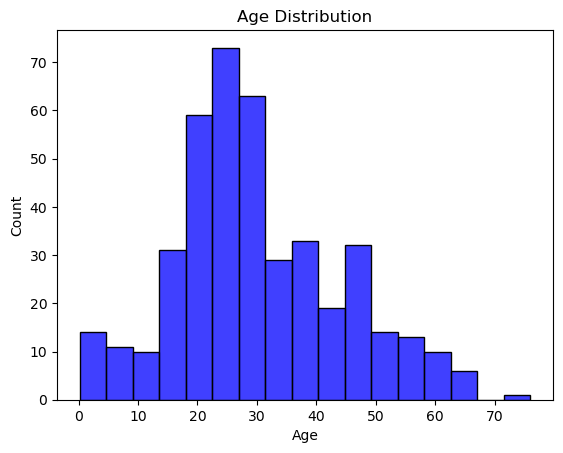

In [61]:
# Distribution of 'Age'
sns.histplot(titanic_data['Age'],color='blue')
plt.title('Age Distribution')
plt.show()

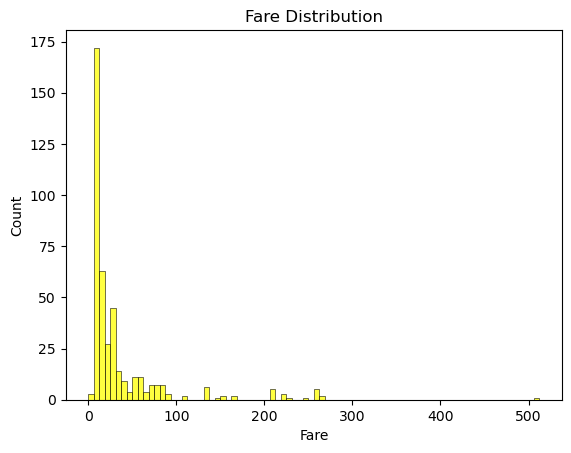

In [63]:
# Distribution of 'Fare'
sns.histplot(titanic_data['Fare'], color='yellow')
plt.title('Fare Distribution')
plt.show()

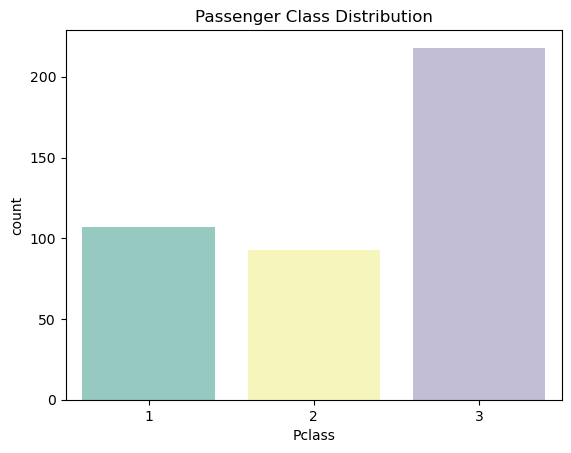

In [85]:
# Count plot for 'Pclass'
sns.countplot(x='Pclass', data=titanic_data,palette="Set3")
plt.title('Passenger Class Distribution')
plt.show()

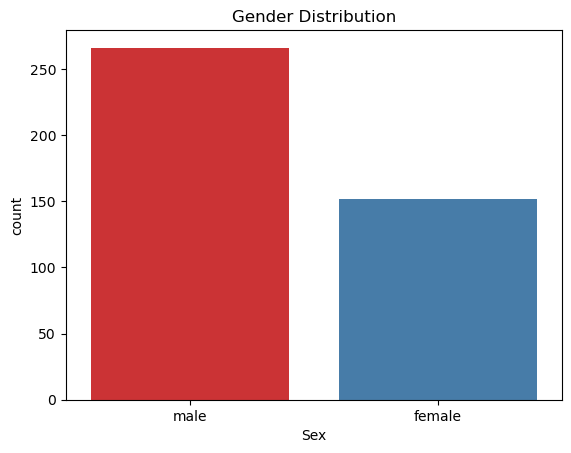

In [78]:
# Count plot for 'Sex'
sns.countplot(x='Sex', data=titanic_data, palette="Set1")
plt.title('Gender Distribution')
plt.show()

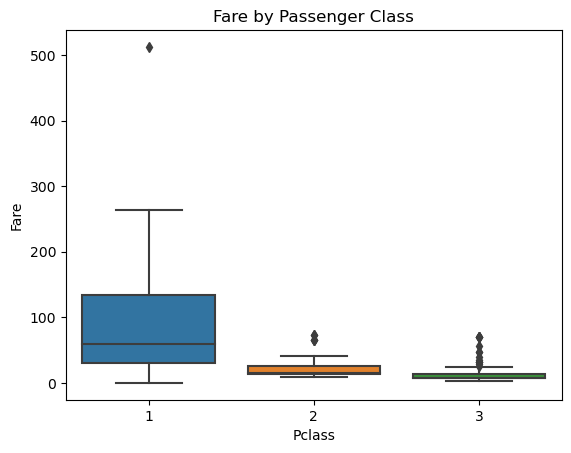

In [66]:
# Boxplot of 'Fare' by 'Pclass'
sns.boxplot(x='Pclass', y='Fare', data=titanic_data)
plt.title('Fare by Passenger Class')
plt.show()

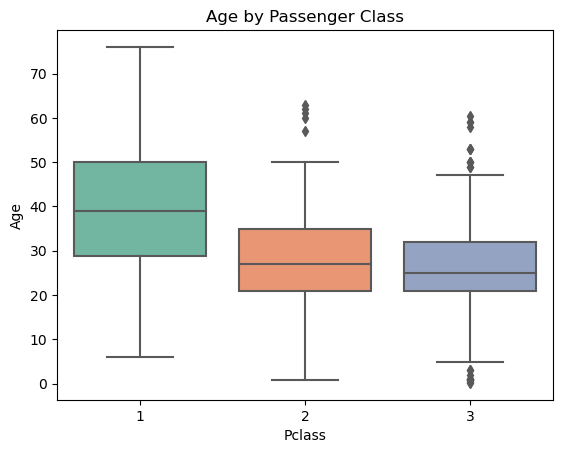

In [75]:
# Boxplot of 'Age' by 'Pclass'
sns.boxplot(x='Pclass', y='Age', data=titanic_data, palette="Set2")
plt.title('Age by Passenger Class')
plt.show()

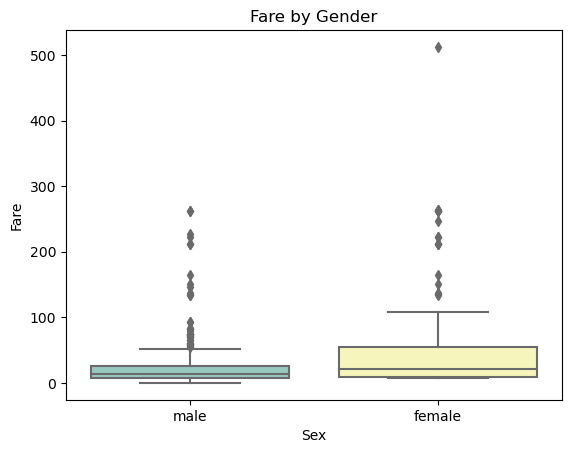

In [76]:
# Boxplot of 'Fare' by 'Sex'
sns.boxplot(x='Sex', y='Fare', data=titanic_data, palette="Set3")
plt.title('Fare by Gender')
plt.show()

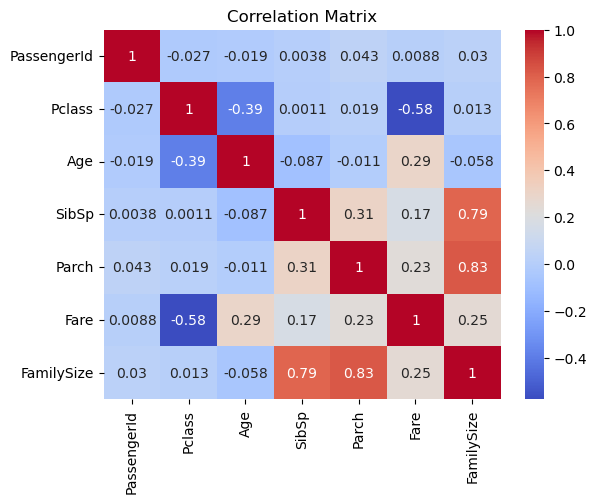

In [74]:
# Correlation matrix
corr_matrix = titanic_data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

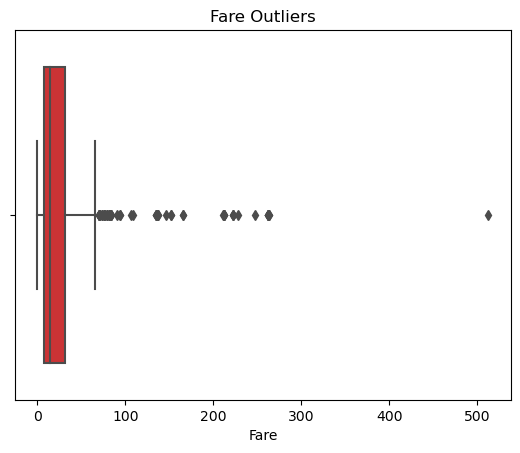

In [84]:
# Boxplot to check for outliers in 'Fare'
sns.boxplot(x=titanic_data['Fare'],palette="Set1")
plt.title('Fare Outliers')
plt.show()



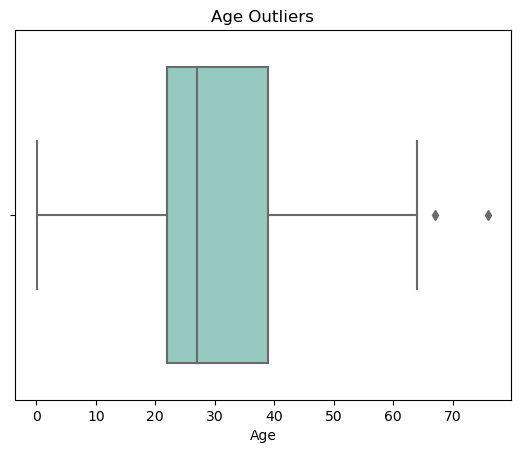

In [79]:
# Boxplot to check for outliers in 'Age'
sns.boxplot(x=titanic_data['Age'],palette="Set3")
plt.title('Age Outliers')
plt.show()

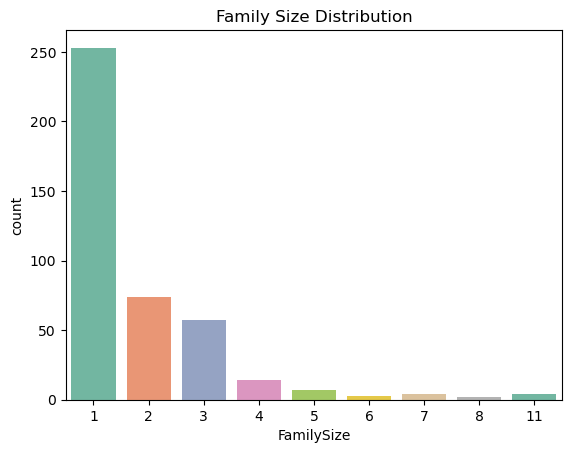

In [80]:
# Create a new column for family size
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Check the distribution of the new feature
sns.countplot(x='FamilySize', data=titanic_data, palette="Set2")
plt.title('Family Size Distribution')
plt.show()


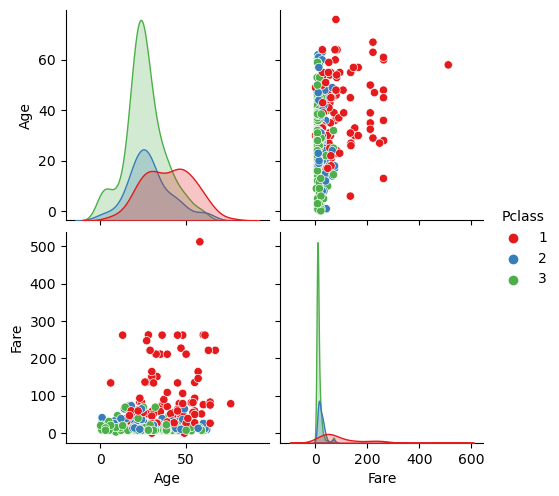

In [90]:
# Pair plot of selected numerical features
sns.pairplot(titanic_data[['Age', 'Fare', 'Pclass']], hue='Pclass', palette="Set1")
plt.show()
